<a href="https://colab.research.google.com/github/RodrigoMendoza23/Act1/blob/main/Act1_Mex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("listings.csv")

In [4]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51


In [5]:
dfn= df[['room_type','host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication','number_of_reviews']].copy()


In [6]:

dfna=pd.read_csv("lift2.csv")
dfna=dfna.fillna(method="bfill")

In [7]:
dfna.head()

,room_type,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,number_of_reviews
0,1,1.00,4001.0,363,4.96,4.93,4.93,0
1,2,1.00,500.0,363,4.96,4.93,4.93,27
2,2,0.67,599.0,323,4.73,4.70,4.91,144
3,1,0.79,18000.0,331,4.59,4.70,4.75,58
4,1,1.00,740.0,314,4.85,4.80,4.95,61


In [8]:
valores_nulos=dfna.isnull().sum()
valores_nulos

room_type                      0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
number_of_reviews              0
dtype: int64

In [9]:
y=dfna[['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication','number_of_reviews']]
x=dfna['room_type']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido availability_365                672.500
host_acceptance_rate              1.105
price                          2975.000
review_scores_rating              5.495
review_scores_cleanliness         5.435
review_scores_communication       5.270
number_of_reviews                91.000
dtype: float64
Limite inferior permitido availability_365              -179.500
host_acceptance_rate             0.825
price                         -985.000
review_scores_rating             4.175
review_scores_cleanliness        4.275
review_scores_communication      4.550
number_of_reviews              -53.000
dtype: float64


In [10]:
df3=y[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

,availability_365,host_acceptance_rate,price,review_scores_rating,review_scores_cleanliness,review_scores_communication,number_of_reviews
0,363,1.00,NaN,4.96,4.93,4.93,0.0
1,363,1.00,500.0,4.96,4.93,4.93,27.0
2,323,NaN,599.0,4.73,4.70,4.91,NaN
3,331,NaN,NaN,4.59,4.70,4.75,58.0
4,314,1.00,740.0,4.85,4.80,4.95,61.0
...,...,...,...,...,...,...,...
22943,365,1.00,450.0,5.00,5.00,5.00,0.0
22944,89,1.00,750.0,5.00,5.00,5.00,3.0
22945,348,1.00,NaN,4.89,4.96,4.93,28.0
22946,361,0.99,1100.0,4.44,4.64,NaN,72.0


In [11]:
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4=df4.assign(room_type=x)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   availability_365             22948 non-null  int64  
 1   host_acceptance_rate         22948 non-null  float64
 2   price                        22948 non-null  float64
 3   review_scores_rating         22948 non-null  float64
 4   review_scores_cleanliness    22948 non-null  float64
 5   review_scores_communication  22948 non-null  float64
 6   number_of_reviews            22948 non-null  float64
 7   room_type                    22948 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 MB


In [12]:
Entire_home=df4[df4["room_type"] == 1]
Hotel_room=df4[df4["room_type"] == 3]
Private_room=df4[df4["room_type"] == 2]
Shared_room=df4[df4["room_type"] == 4]

## Number_of_reviews vs host_acceptance_rate

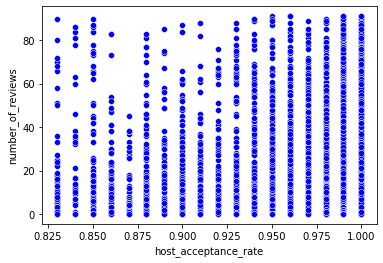

In [14]:
from turtle import color 
sns.scatterplot(x="host_acceptance_rate",y="number_of_reviews",color="blue",data=Entire_home)

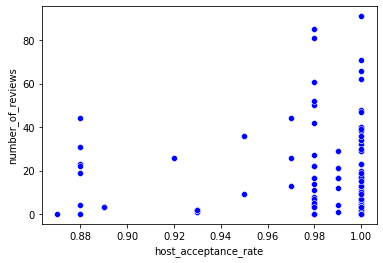

In [15]:
from turtle import color 
sns.scatterplot(x="host_acceptance_rate",y="number_of_reviews",color="blue",data=Hotel_room)

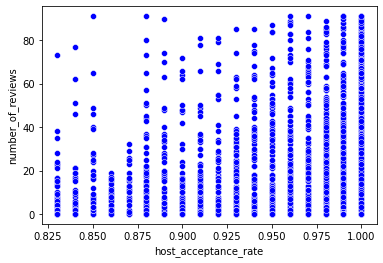

In [16]:
from turtle import color 
sns.scatterplot(x="host_acceptance_rate",y="number_of_reviews",color="blue",data=Private_room)

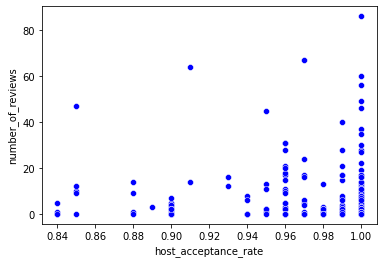

In [17]:
from turtle import color 
sns.scatterplot(x="host_acceptance_rate",y="number_of_reviews",color="blue",data=Shared_room)

## Number_of_reviews  vs price

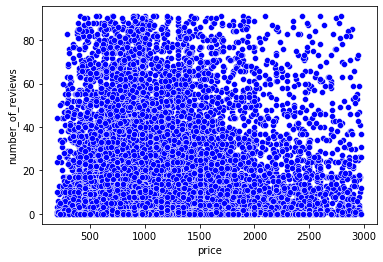

In [18]:
sns.scatterplot(x="price",y="number_of_reviews",color="blue",data=Entire_home)

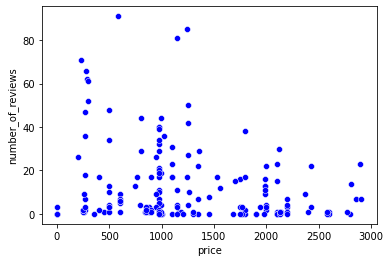

In [19]:
sns.scatterplot(x="price",y="number_of_reviews",color="blue",data=Hotel_room)

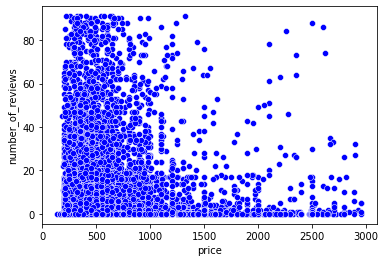

In [20]:
sns.scatterplot(x="price",y="number_of_reviews",color="blue",data=Private_room)

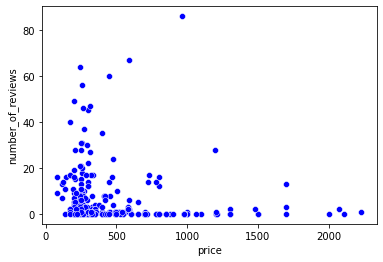

In [21]:
sns.scatterplot(x="price",y="number_of_reviews",color="blue",data=Shared_room)

## Number_of_reviews  vs availability_365

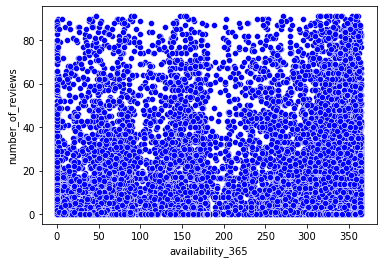

In [22]:
sns.scatterplot(x="availability_365",y="number_of_reviews",color="blue",data=Entire_home)

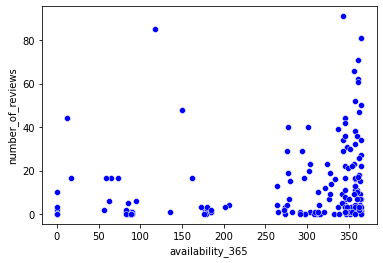

In [23]:
sns.scatterplot(x="availability_365",y="number_of_reviews",color="blue",data=Hotel_room)

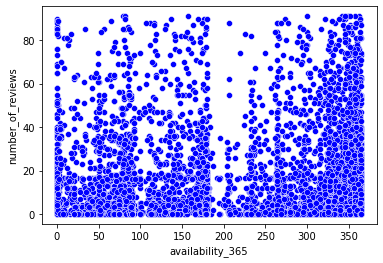

In [24]:
sns.scatterplot(x="availability_365",y="number_of_reviews",color="blue",data=Private_room)

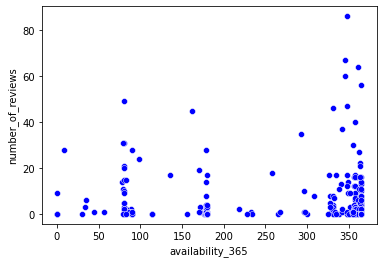

In [25]:
sns.scatterplot(x="availability_365",y="number_of_reviews",color="blue",data=Shared_room)

## 	Number_of_reviews  vs review_scores_rating

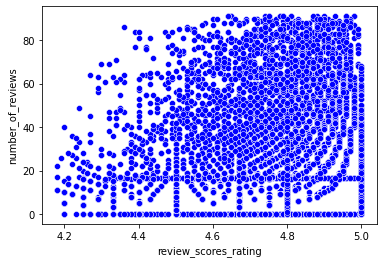

In [26]:
sns.scatterplot(x="review_scores_rating",y="number_of_reviews",color="blue",data=Entire_home)

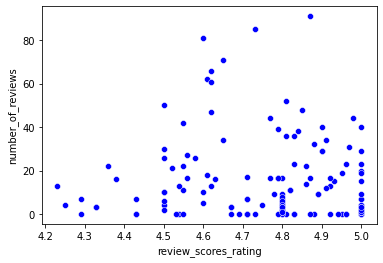

In [27]:
sns.scatterplot(x="review_scores_rating",y="number_of_reviews",color="blue",data=Hotel_room)

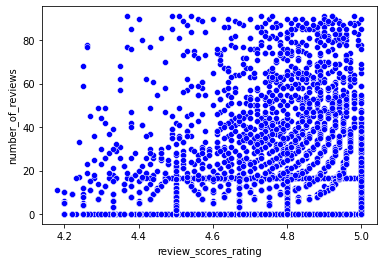

In [28]:
sns.scatterplot(x="review_scores_rating",y="number_of_reviews",color="blue",data=Private_room)

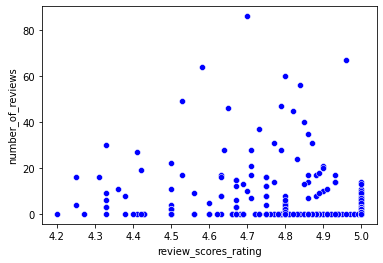

In [29]:
sns.scatterplot(x="review_scores_rating",y="number_of_reviews",color="blue",data=Shared_room)

## 	Number_of_reviews  vs review_scores_cleanliness

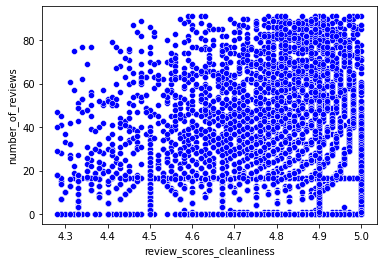

In [30]:
sns.scatterplot(x="review_scores_cleanliness",y="number_of_reviews",color="blue",data=Entire_home)

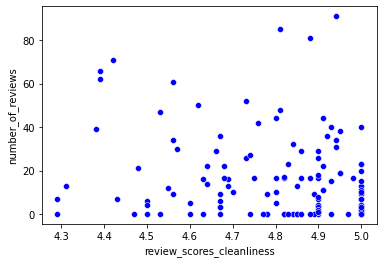

In [31]:
sns.scatterplot(x="review_scores_cleanliness",y="number_of_reviews",color="blue",data=Hotel_room)

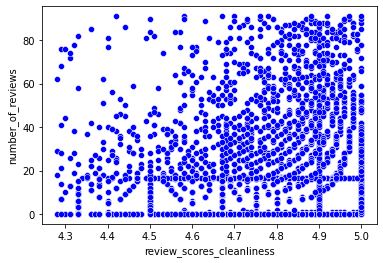

In [32]:
sns.scatterplot(x="review_scores_cleanliness",y="number_of_reviews",color="blue",data=Private_room)

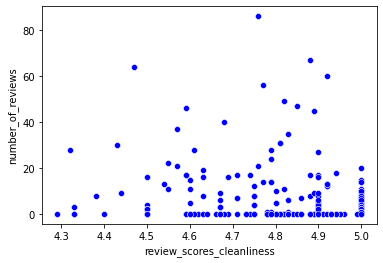

In [33]:
sns.scatterplot(x="review_scores_cleanliness",y="number_of_reviews",color="blue",data=Shared_room)

## Number_of_reviews  vs review_scores_communication

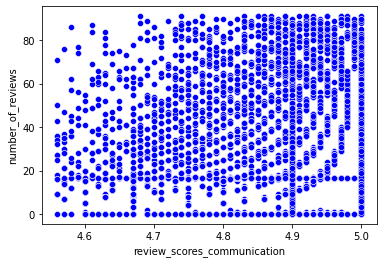

In [34]:
sns.scatterplot(x="review_scores_communication",y="number_of_reviews",color="blue",data=Entire_home)

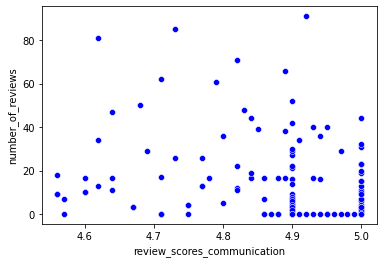

In [35]:
sns.scatterplot(x="review_scores_communication",y="number_of_reviews",color="blue",data=Hotel_room)

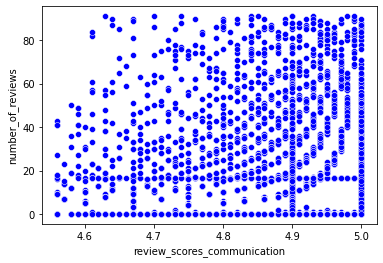

In [36]:
sns.scatterplot(x="review_scores_communication",y="number_of_reviews",color="blue",data=Private_room)

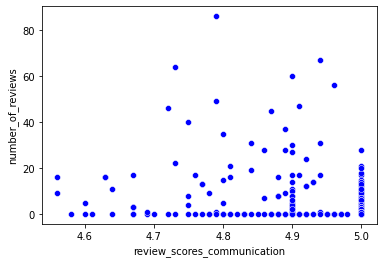

In [37]:
sns.scatterplot(x="review_scores_communication",y="number_of_reviews",color="blue",data=Shared_room)

## Entire home

In [38]:
Vars_indep=Entire_home[["host_acceptance_rate"]]
Vars_indep1=Entire_home[["price"]]
Vars_indep2=Entire_home[["availability_365"]]
Vars_indep3=Entire_home[["review_scores_rating"]]
Vars_indep4=Entire_home[["review_scores_cleanliness"]]
Vars_indep5=Entire_home[["review_scores_communication"]]
Vars_dep=Entire_home["number_of_reviews"]

In [39]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model1= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()

In [40]:
model.fit(X=Vars_indep,y=Vars_dep)
model1.fit(X=Vars_indep1,y=Vars_dep)
model2.fit(X=Vars_indep2,y=Vars_dep)
model3.fit(X=Vars_indep3,y=Vars_dep)
model4.fit(X=Vars_indep4,y=Vars_dep)
model5.fit(X=Vars_indep5,y=Vars_dep)

LinearRegression()

In [41]:
print("host_acceptance_rate:",model.score(Vars_indep,Vars_dep))
print("price:",model1.score(Vars_indep1,Vars_dep))
print("availability_365:",model2.score(Vars_indep2,Vars_dep))
print("review_scores_rating:",model3.score(Vars_indep3,Vars_dep))
print("review_scores_cleanliness:",model4.score(Vars_indep4,Vars_dep))
print("review_scores_communication:",model5.score(Vars_indep5,Vars_dep))

host_acceptance_rate: 9.688727577339407e-06
price: 0.0015293889539594874
availability_365: 0.003875691674045889
review_scores_rating: 0.013279044392262906
review_scores_cleanliness: 0.022752276176506214
review_scores_communication: 0.03259699979375863


In [59]:
coef_Deter=model5.score(X=Vars_indep5, y=Vars_dep)
print("Coeficiente de determinación:",coef_Deter)
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de corelación:",coef_Correl)

Coeficiente de determinación: 0.03259699979375863
Coeficiente de corelación: 0.18054639235874703


In [60]:
model5.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-38.03122735]),
 '_residues': 6099557.324694942,
 'rank_': 1,
 'singular_': array([11.92048477]),
 'intercept_': 206.75502738673907}

La variable que mas correlacion en entire home, es review_scores_communication con un modelo matematico es y=-38.031x + 11.92

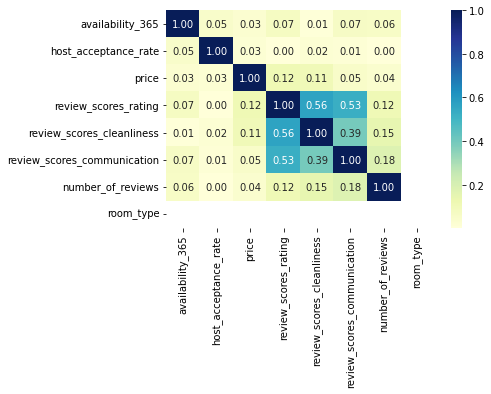

In [43]:
Corr_Factors=Entire_home.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Hotel room

In [44]:
Vars_indep_2=Hotel_room[["host_acceptance_rate"]]
Vars_indep1_5=Hotel_room[["price"]]
Vars_indep2_5=Hotel_room[["availability_365"]]
Vars_indep3_5=Hotel_room[["review_scores_rating"]]
Vars_indep4_5=Hotel_room[["review_scores_cleanliness"]]
Vars_indep5_5=Hotel_room[["review_scores_communication"]]
Vars_dep1=Hotel_room["number_of_reviews"]

In [45]:
from sklearn.linear_model import LinearRegression
model_5= LinearRegression()
model1_5= LinearRegression()
model2_5= LinearRegression()
model3_5= LinearRegression()
model4_5= LinearRegression()
model5_5= LinearRegression()

In [46]:
model_5.fit(X=Vars_indep_2,y=Vars_dep1)
model1_5.fit(X=Vars_indep1_5,y=Vars_dep1)
model2_5.fit(X=Vars_indep2_5,y=Vars_dep1)
model3_5.fit(X=Vars_indep3_5,y=Vars_dep1)
model4_5.fit(X=Vars_indep4_5,y=Vars_dep1)
model5_5.fit(X=Vars_indep5_5,y=Vars_dep1)

LinearRegression()

In [47]:
print("host_acceptance_rate:",model_5.score(Vars_indep_2,Vars_dep1))
print("price:",model1_5.score(Vars_indep1_5,Vars_dep1))
print("availability_365:",model2_5.score(Vars_indep2_5,Vars_dep1))
print("review_scores_rating:",model3_5.score(Vars_indep3_5,Vars_dep1))
print("review_scores_cleanliness:",model4_5.score(Vars_indep4_5,Vars_dep1))
print("review_scores_communication:",model5_5.score(Vars_indep5_5,Vars_dep1))

host_acceptance_rate: 0.004710369616617305
price: 0.046699540453199906
availability_365: 0.03642711630552553
review_scores_rating: 0.026447522840118753
review_scores_cleanliness: 0.08655069790802594
review_scores_communication: 0.08653986216299459


In [61]:
coef_Deter1=model4_5.score(X=Vars_indep4_5, y=Vars_dep1)
print("Coeficiente de determinación:",coef_Deter1)
coef_Correl1=np.sqrt(coef_Deter1)
print("Coeficiente de corelación:",coef_Correl1)

Coeficiente de determinación: 0.08655069790802594
Coeficiente de corelación: 0.2941949998011964


In [62]:
model4_5.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-29.14246453]),
 '_residues': 50673.58558830749,
 'rank_': 1,
 'singular_': array([2.37770299]),
 'intercept_': 154.00557469782666}

La variable que mas correlacion en entire home, es review_scores_cleanliness con un modelo matematico es y=-29.14x + 2.37

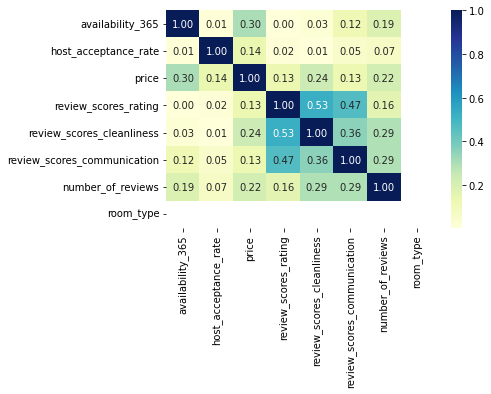

In [48]:
Corr_Factors_1=Hotel_room.corr()
Corr_Factors1_5= abs(Corr_Factors_1)
Heat_Map= sns.heatmap(Corr_Factors1_5, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Private room

In [49]:
Vars_indep_3=Private_room[["host_acceptance_rate"]]
Vars_indep1_7=Private_room[["price"]]
Vars_indep2_7=Private_room[["availability_365"]]
Vars_indep3_7=Private_room[["review_scores_rating"]]
Vars_indep4_7=Private_room[["review_scores_cleanliness"]]
Vars_indep5_7=Private_room[["review_scores_communication"]]
Vars_dep2=Private_room["number_of_reviews"]

In [50]:
from sklearn.linear_model import LinearRegression
model_7= LinearRegression()
model1_7= LinearRegression()
model2_7= LinearRegression()
model3_7= LinearRegression()
model4_7= LinearRegression()
model5_7= LinearRegression()

In [51]:
model_7.fit(X=Vars_indep_3,y=Vars_dep2)
model1_7.fit(X=Vars_indep1_7,y=Vars_dep2)
model2_7.fit(X=Vars_indep2_7,y=Vars_dep2)
model3_7.fit(X=Vars_indep3_7,y=Vars_dep2)
model4_7.fit(X=Vars_indep4_7,y=Vars_dep2)
model5_7.fit(X=Vars_indep5_7,y=Vars_dep2)

LinearRegression()

In [52]:
print("host_acceptance_rate:",model_7.score(Vars_indep_3,Vars_dep2))
print("price:",model1_7.score(Vars_indep1_7,Vars_dep2))
print("availability_365:",model2_7.score(Vars_indep2_7,Vars_dep2))
print("review_scores_rating:",model3_7.score(Vars_indep3_7,Vars_dep2))
print("review_scores_cleanliness:",model4_7.score(Vars_indep4_7,Vars_dep2))
print("review_scores_communication:",model5_7.score(Vars_indep5_7,Vars_dep2))

host_acceptance_rate: 0.000598329486470317
price: 0.007016473294397696
availability_365: 0.007493789640944604
review_scores_rating: 0.009353539997384974
review_scores_cleanliness: 0.018639942293028566
review_scores_communication: 0.031566428222442044


In [63]:
coef_Deter2=model5_7.score(X=Vars_indep5_7, y=Vars_dep2)
print("Coeficiente de determinación:",coef_Deter2)
coef_Correl2=np.sqrt(coef_Deter2)
print("Coeficiente de corelación:",coef_Correl2)

Coeficiente de determinación: 0.031566428222442044
Coeficiente de corelación: 0.1776694352510922


In [64]:
model5_7.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-31.97191769]),
 '_residues': 2701144.193617364,
 'rank_': 1,
 'singular_': array([9.28074845]),
 'intercept_': 169.6746518576754}

La variable que mas correlacion en entire home, es review_scores_communication  con un modelo matematico es y=-31.97x + 9.28

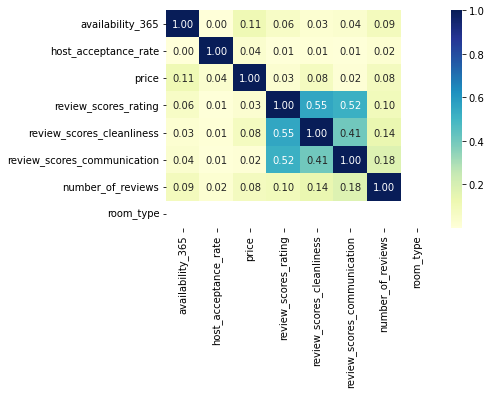

In [53]:
Corr_Factors_2=Private_room.corr()
Corr_Factors1_7= abs(Corr_Factors_2)
Heat_Map= sns.heatmap(Corr_Factors1_7, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Shared room

In [54]:
Vars_indep_4=Shared_room[["host_acceptance_rate"]]
Vars_indep1_8=Shared_room[["price"]]
Vars_indep2_8=Shared_room[["availability_365"]]
Vars_indep3_8=Shared_room[["review_scores_rating"]]
Vars_indep4_8=Shared_room[["review_scores_cleanliness"]]
Vars_indep5_8=Shared_room[["review_scores_communication"]]
Vars_dep3=Shared_room["number_of_reviews"]

In [55]:
from sklearn.linear_model import LinearRegression
model_8= LinearRegression()
model1_8= LinearRegression()
model2_8= LinearRegression()
model3_8= LinearRegression()
model4_8= LinearRegression()
model5_8= LinearRegression() 

In [56]:
model_8.fit(X=Vars_indep_4,y=Vars_dep3)
model1_8.fit(X=Vars_indep1_8,y=Vars_dep3)
model2_8.fit(X=Vars_indep2_8,y=Vars_dep3)
model3_8.fit(X=Vars_indep3_8,y=Vars_dep3)
model4_8.fit(X=Vars_indep4_8,y=Vars_dep3)
model5_8.fit(X=Vars_indep5_8,y=Vars_dep3)

LinearRegression()

In [57]:
print("host_acceptance_rate:",model_8.score(Vars_indep_4,Vars_dep3))
print("price:",model1_8.score(Vars_indep1_8,Vars_dep3))
print("availability_365:",model2_8.score(Vars_indep2_8,Vars_dep3))
print("review_scores_rating:",model3_8.score(Vars_indep3_8,Vars_dep3))
print("review_scores_cleanliness:",model4_8.score(Vars_indep4_8,Vars_dep3))
print("review_scores_communication:",model5_8.score(Vars_indep5_8,Vars_dep3))

host_acceptance_rate: 0.0006803262491602569
price: 0.007759402619821332
availability_365: 0.003964165665297448
review_scores_rating: 0.037561902165170746
review_scores_cleanliness: 0.050225997113648946
review_scores_communication: 0.04732894299002621


In [65]:
coef_Deter3=model4_8.score(Vars_indep4_8,Vars_dep3)
print("Coeficiente de determinación:",coef_Deter3)
coef_Correl3=np.sqrt(coef_Deter3)
print("Coeficiente de corelación:",coef_Correl3)

Coeficiente de determinación: 0.050225997113648946
Coeficiente de corelación: 0.2241115729132455


In [66]:
model4_8.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-14.99788651]),
 '_residues': 40781.139752495714,
 'rank_': 1,
 'singular_': array([3.09637649]),
 'intercept_': 78.10962929130906}

La variable que mas correlacion en entire home, es review_scores_cleanliness con un modelo matematico es y=-14.99x + 3.09

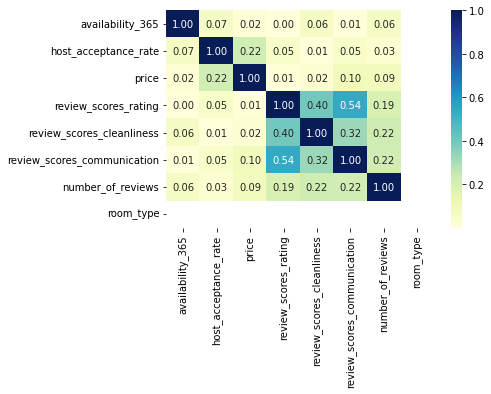

In [58]:
Corr_Factors_3=Shared_room.corr()
Corr_Factors1_8= abs(Corr_Factors_3)
Heat_Map= sns.heatmap(Corr_Factors1_8, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map